In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import pickle
import seaborn as sns

import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

In [2]:
import sys  
sys.path.insert(0, '/Users/Daniel/Documents/Research Projects/Cosmic-Filaments/Gama_Galaxies/')

import gama_gals.gama_functs as gf # now call all functions using "gf".'function_name'
# Using outlier treated gama

# import pickle with gama data
f = open('/Users/Daniel/Documents/Research Projects/Cosmic-Filaments/Pickles/gamagals_complete_3point5sigma.pkl', 'rb') #from persistence 4 file
gama = pickle.load(f)

In [3]:
#show all columns
pd.set_option('display.max_columns', None)
gama

,CATAID,RA,DEC,Z,Z_TONRY,logmstar,dellogmstar,GAMA_NAME,NQ,logage,dellogage,logtau,dellogtau,metal,delmetal,extBV,delextBV,logLWage,dellogLWage,gminusi,delgminusi,X,Y,Z.2,d,GroupID,FilID,px,py,pz,fil_d,node_d,Fil_ID,Fil Length
0,6802,174.00600,0.72093,0.05054,0.051814,9.07603,0.131666,GAMAJ113601.43+004315.3,4,9.73361,0.251961,9.79510,0.174241,0.017558,0.009571,0.128447,0.097892,9.13797,0.367253,0.714898,0.047596,NaN,NaN,NaN,NaN,NaN,NaN,-216.625210,22.745292,2.740837,4.996397,15.630060,383.0,9.576572
1,6806,174.02279,0.70594,0.33124,0.332854,10.97920,0.099166,GAMAJ113605.47+004221.3,4,9.73226,0.185493,9.70157,0.228172,0.008544,0.007267,0.157169,0.090216,9.25334,0.261045,0.781605,0.040918,NaN,NaN,NaN,NaN,NaN,NaN,-1224.886159,128.248150,15.175059,29.451601,59.637607,3444.0,15.535263
2,6808,174.10071,0.65891,0.22936,0.230851,10.79160,0.098116,GAMAJ113624.17+003932.1,4,9.84259,0.141759,9.09017,0.463165,0.005238,0.004209,0.103443,0.092987,9.70270,0.195297,1.047030,0.052520,NaN,NaN,NaN,NaN,NaN,NaN,-895.469883,92.526596,10.353321,3.835973,41.224331,4604.0,17.173529
3,6810,174.10908,0.80390,0.32630,0.327908,11.11970,0.096136,GAMAJ113626.18+004814.0,4,9.77507,0.161527,9.44149,0.381685,0.010000,0.009512,0.213611,0.128855,9.47198,0.249714,1.109650,0.049929,NaN,NaN,NaN,NaN,NaN,NaN,-1209.953065,124.842693,17.067738,7.405275,70.020364,6751.0,24.703361
4,6816,174.01896,0.66580,0.07641,0.077715,9.01239,0.146456,GAMAJ113604.55+003956.8,4,9.74954,0.249899,9.76074,0.199806,0.017116,0.012548,0.157250,0.109367,9.18014,0.386884,0.792209,0.088951,NaN,NaN,NaN,NaN,NaN,NaN,-323.199357,33.861492,3.776433,1.535282,21.021750,637.0,9.504916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113150,4316366,213.05437,1.30309,0.39424,0.395438,10.66650,0.103570,GAMAJ141213.04+011811.1,4,9.74387,0.166627,9.58603,0.314890,0.011552,0.009595,0.204443,0.116592,9.35225,0.281883,1.002530,0.066198,NaN,NaN,NaN,NaN,NaN,NaN,-1187.973415,-773.082676,32.241104,1.321570,67.473809,5878.0,66.369997
113151,4319812,217.17037,1.24932,0.36760,0.368687,10.78200,0.114570,GAMAJ142840.88+011457.5,3,9.73837,0.180143,9.57994,0.333225,0.015309,0.012675,0.289038,0.143879,9.34651,0.328285,1.200770,0.082471,NaN,NaN,NaN,NaN,NaN,NaN,-1068.100884,-809.862442,29.232078,1.333843,45.828704,3989.0,39.288667
113152,4321280,218.97938,1.18502,0.25990,0.260865,10.18250,0.140112,GAMAJ143555.04+011106.0,4,9.73788,0.214996,9.63324,0.300932,0.017234,0.012418,0.282272,0.151406,9.28620,0.385645,1.154480,0.115395,NaN,NaN,NaN,NaN,NaN,NaN,-780.131624,-631.273402,20.758872,2.071966,31.328595,5578.0,33.138337
113153,4321789,219.54175,1.20398,0.29884,0.299822,10.41060,0.131773,GAMAJ143810.02+011214.3,4,9.73840,0.200243,9.68338,0.258316,0.011334,0.010206,0.295945,0.123099,9.27067,0.348444,1.093130,0.099525,NaN,NaN,NaN,NaN,NaN,NaN,-871.610163,-719.567317,23.754061,3.001869,22.936076,2988.0,13.665752


In [4]:
x = np.array(gama['logmstar']) # x stays the same to decouple mass
# logage
param = 'logage'
y = np.array(gama[param])

#dparam, y_exp, res, X = gf.mass_decoupler_masked(x, y, 40)
# X is mass (with mask to remove outliers), dparam is DELTA parameter
delta_age, y_exp, res, X, dmask = gf.mass_decoupler_masked(x, y, 40) #dmask is array to mask original stuff

In [5]:
print(delta_age.shape, "\n", dmask.shape,"\n", gama['fil_d'].shape, "\n\n", X.shape,"\n", gama['logmstar'].shape)

(108549,) 
 (108563,) 
 (108563,) 

 (108549,) 
 (108563,)


Just checking the shapes, it seems like the $\Delta$age array is already trimmed by an amount 

- so it seems like we go from 108563 to 108549 after the masking from the mass decoupler mask function

In [6]:
y_exp.shape

(108563,)

Text(0, 0.5, '$\\Delta$age')

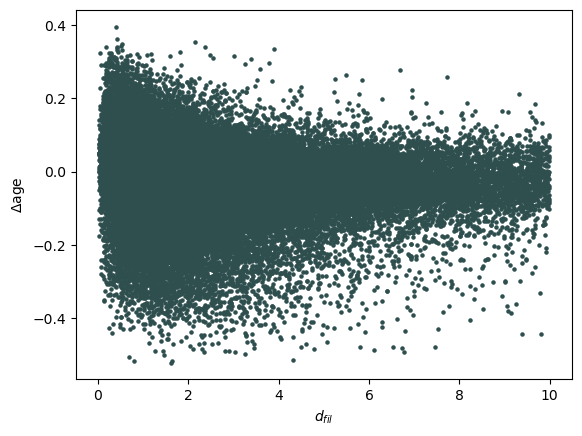

In [7]:
dfil = np.array(gama['fil_d'])
dfil_dmask = dfil[dmask] 

mask2 = np.where((dfil_dmask<10) & (dfil_dmask>0.01)) #MASK2

plt.scatter(dfil_dmask[mask2], delta_age[mask2], s = 5, c = 'darkslategrey')
plt.xlabel('$d_{fil}$') ; plt.ylabel('$\Delta$age')

<ErrorbarContainer object of 3 artists>

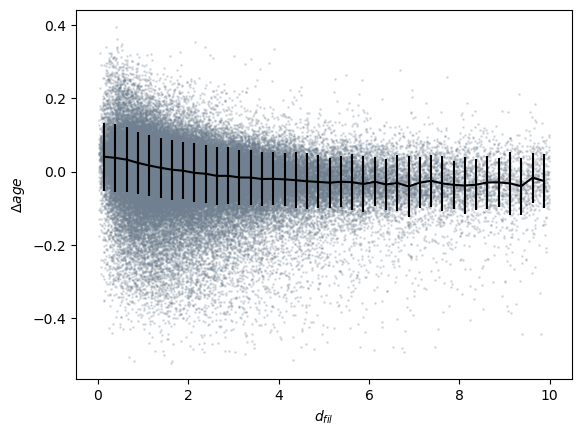

In [8]:
B = 40 

bin_medians, bin_edges, binnumber = stats.binned_statistic(x=dfil_dmask[mask2], values=delta_age[mask2],statistic= 'median', bins = B)
std, s_edges, s_binnumber = stats.binned_statistic(x=dfil_dmask[mask2], values = delta_age[mask2], statistic = 'std', bins = B)
plt.figure()

plt.scatter(dfil_dmask[mask2], delta_age[mask2], s = 1,color = 'slategray', alpha = 0.2)
plt.xlabel("$d_{fil}$") ; plt.ylabel("$\Delta age$")

# Errorbars 
errbars = (bin_edges[1:] + bin_edges[:-1])/2        # x position of median points
plt.errorbar(errbars ,bin_medians, yerr=std, fmt='k-')  # This plots median point x value, and median (which is y value)

Text(0, 0.5, '$\\Delta$age')

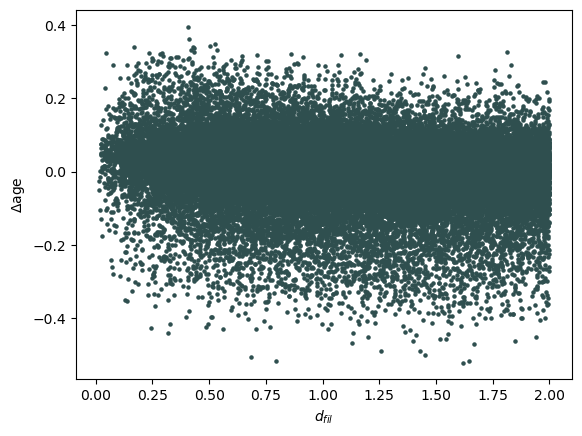

In [9]:
## SUPER ZOOMED IN MASK (LESS THAN 2 MEGAPARSECS)
dfil = np.array(gama['fil_d'])
dfil_dmask = dfil[dmask] 

mask_2mpcs = np.where((dfil_dmask<2) & (dfil_dmask>0.01))

X_2mpc = dfil_dmask[mask_2mpcs] ; Y_2mpc = delta_age[mask_2mpcs] # define variables affected by mask 

plt.scatter(X_2mpc, Y_2mpc, s = 5, c = 'darkslategrey')
plt.xlabel('$d_{fil}$') ; plt.ylabel('$\Delta$age')

<ErrorbarContainer object of 3 artists>

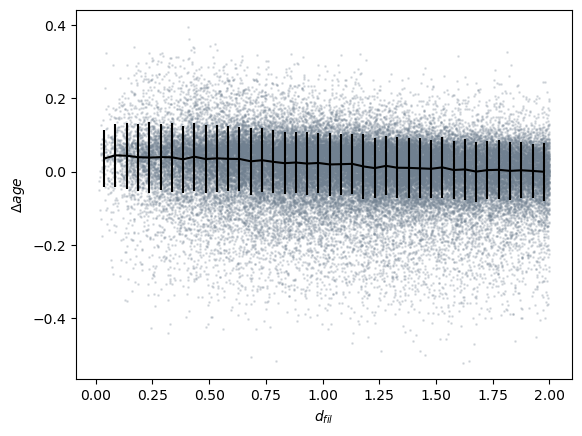

In [10]:
B = 40 

bin_medians, bin_edges, binnumber = stats.binned_statistic(x=X_2mpc, values=Y_2mpc,statistic= 'median', bins = B)
std, s_edges, s_binnumber = stats.binned_statistic(x=X_2mpc, values = Y_2mpc, statistic = 'std', bins = B)
plt.figure()

plt.scatter(X_2mpc, Y_2mpc, s = 1,color = 'slategray', alpha = 0.2)
plt.xlabel("$d_{fil}$") ; plt.ylabel("$\Delta age$")

# Errorbars 
errbars = (bin_edges[1:] + bin_edges[:-1])/2        # x position of median points
plt.errorbar(errbars ,bin_medians, yerr=std, fmt='k-')  # This plots median point x value, and median (which is y value)

In [12]:
dfil = np.array(gama['fil_d'])
dfil_dmask = dfil[dmask] 

mask3 = np.where((dfil_dmask<6) & (dfil_dmask>0.01))
X3 = dfil_dmask[mask3] ; Y3 = delta_age[mask3]

<ErrorbarContainer object of 3 artists>

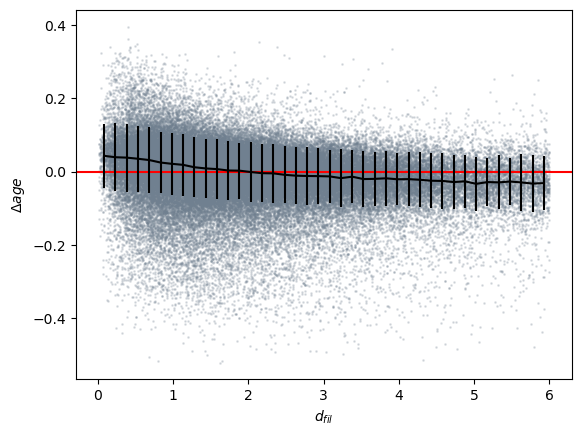

In [13]:
B = 40 

bin_medians, bin_edges, binnumber = stats.binned_statistic(x=dfil_dmask[mask3], values=delta_age[mask3],statistic= 'median', bins = B)
std, s_edges, s_binnumber = stats.binned_statistic(x=dfil_dmask[mask3], values = delta_age[mask3], statistic = 'std', bins = B)
plt.figure()

plt.scatter(dfil_dmask[mask3], delta_age[mask3], s = 1,color = 'slategray', alpha = 0.2)
plt.xlabel("$d_{fil}$") ; plt.ylabel("$\Delta age$")
plt.axhline(c='red')

# Errorbars 
errbars = (bin_edges[1:] + bin_edges[:-1])/2        # x position of median points
plt.errorbar(errbars ,bin_medians, yerr=std, fmt='k-')  # This plots median point x value, and median (which is y value)

### Change around filament distances now and plot $\Delta$age against jumbled up $d_{fil}$

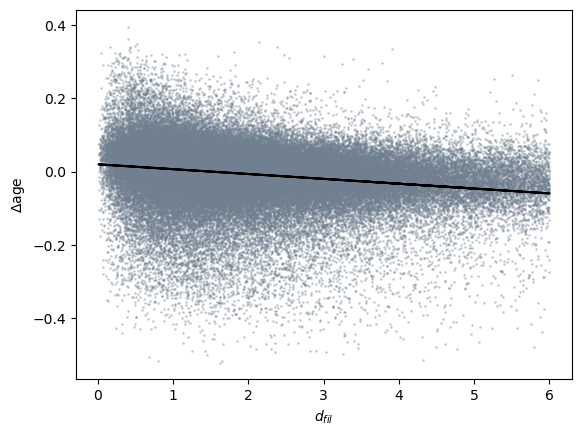

In [14]:
params = np.polyfit(X3, Y3, 1)   #returns the "m" and "b" 

plt.scatter(X3, Y3, s = 1,alpha = 0.3, c = 'slategrey')
plt.xlabel('$d_{fil}$') ; plt.ylabel('$\Delta$age')
plt.plot(X3, params[0]*X3 + params[1], c = 'k')

<ErrorbarContainer object of 3 artists>

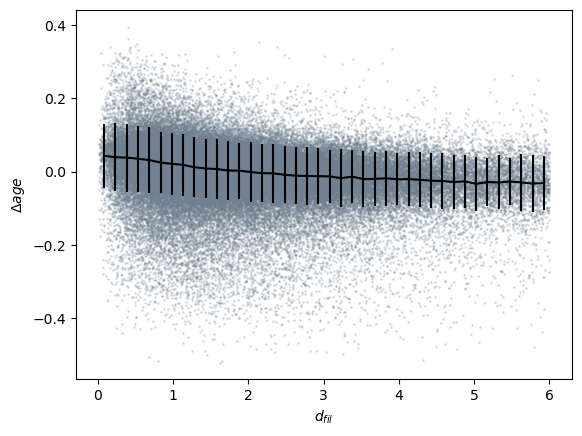

In [16]:
# Instead of line, do median fit 
bin_medians, bin_edges, binnumber = stats.binned_statistic(x=X3, values=Y3,statistic= 'median', bins = B)
std, s_edges, s_binnumber = stats.binned_statistic(x=X3, values = Y3, statistic = 'std', bins = B)
plt.figure()

plt.scatter(X3, Y3, s = 1,color = 'slategray', alpha = 0.2)
plt.xlabel("$d_{fil}$") ; plt.ylabel("$\Delta age$")

# Errorbars 
errbars = (bin_edges[1:] + bin_edges[:-1])/2        # x position of median points
plt.errorbar(errbars ,bin_medians, yerr=std, fmt='k-') 

In [17]:
# residuals 
res = Y3 - (params[0]*X3 + params[1])

Text(0, 0.5, 'residuals')

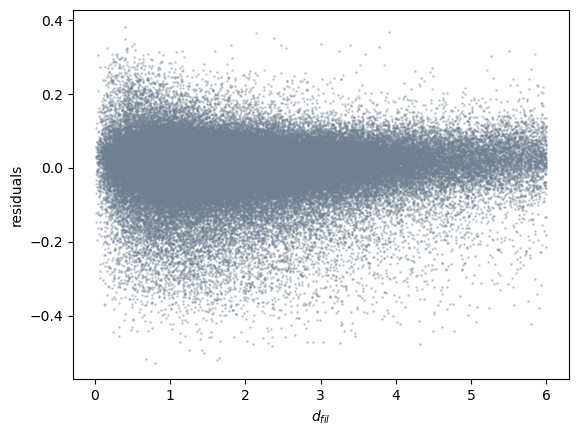

In [18]:
plt.scatter(X3, res, s = 1,alpha = 0.3, c = 'slategrey')
plt.xlabel('$d_{fil}$') ; plt.ylabel('residuals')

### Shuffling

Text(0.5, 1.0, 'best fit line for $\\Delta age$ vs. $d_{fil}$ ')

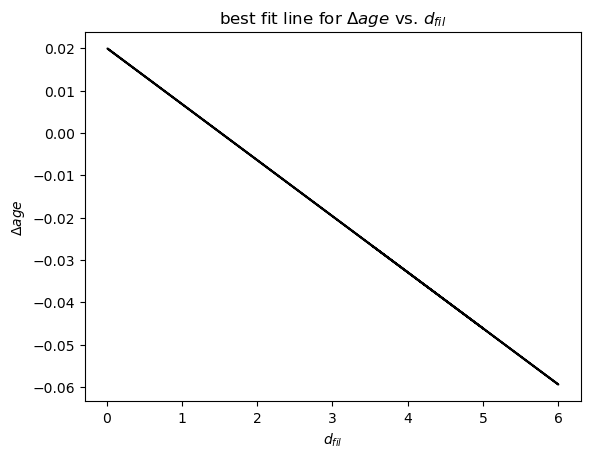

In [19]:
# to compare shuffling: this is what fit line to original delta age looks like (NOT shuffled)
plt.plot(X3, params[0]*X3 + params[1], c = 'k')
plt.xlabel("$d_{fil}$") ; plt.ylabel("$\Delta age$")
plt.title('best fit line for $\Delta age$ vs. $d_{fil}$ ')

In [20]:
# delta age and d_fil are what we want to compare and jumble up 
dfil_shuffled = dfil_dmask[mask3] #shuffling our X's
np.random.shuffle(dfil_shuffled)
dfil_shuffled

array([5.43301876, 4.91052116, 1.34516523, ..., 2.23877611, 1.90556294,
       0.66197902])

Text(0, 0.5, '$\\Delta$age')

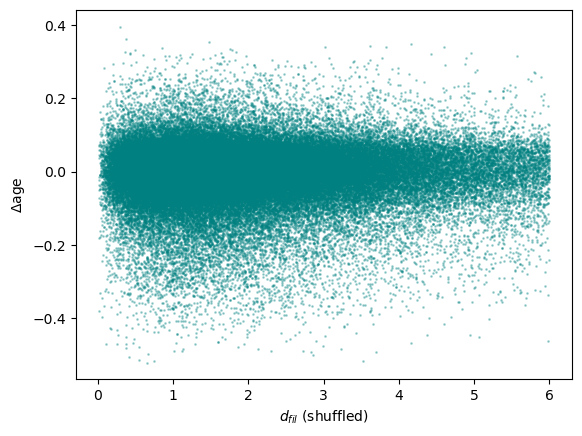

In [21]:
plt.scatter(dfil_shuffled, Y3, s = 1,alpha = 0.3, c = 'teal') 
plt.xlabel('$d_{fil}$ (shuffled)') ; plt.ylabel('$\Delta$age')

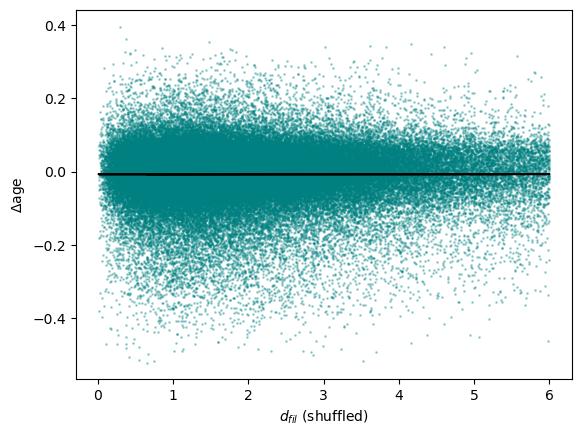

In [22]:
params2 = np.polyfit(dfil_shuffled, Y3, 1)   #returns the "m" and "b" 

plt.scatter(dfil_shuffled, Y3, s = 1,alpha = 0.3, c = 'teal') 
plt.xlabel('$d_{fil}$ (shuffled)') ; plt.ylabel('$\Delta$age')
plt.plot(dfil_shuffled, params2[0]*dfil_shuffled + params2[1], c = 'k')

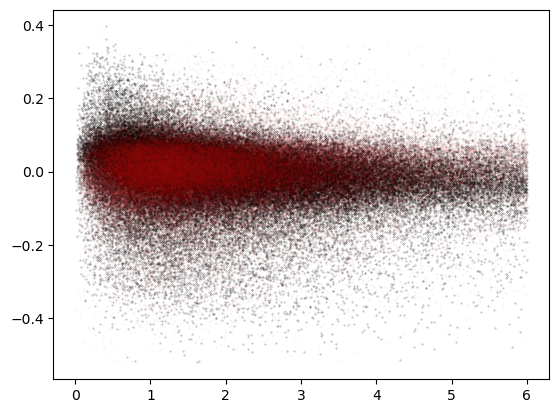

In [23]:
plt.scatter(X3, Y3, s = 0.1,alpha = 0.4, c = 'k')
plt.scatter(dfil_shuffled, Y3, s = 0.1,alpha = 0.1, c = 'firebrick') 

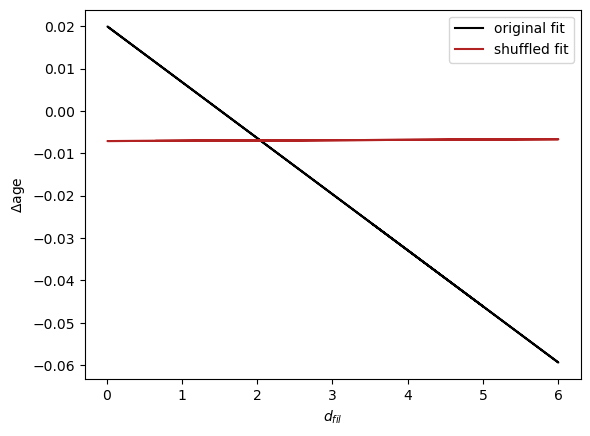

In [24]:
plt.plot(X3, params[0]*X3 + params[1], c = 'k', label = 'original fit')
plt.plot(dfil_shuffled, params2[0]*dfil_shuffled + params2[1], c = 'firebrick', label = 'shuffled fit')
plt.xlabel('$d_{fil}$') ; plt.ylabel('$\Delta$age')
plt.legend()

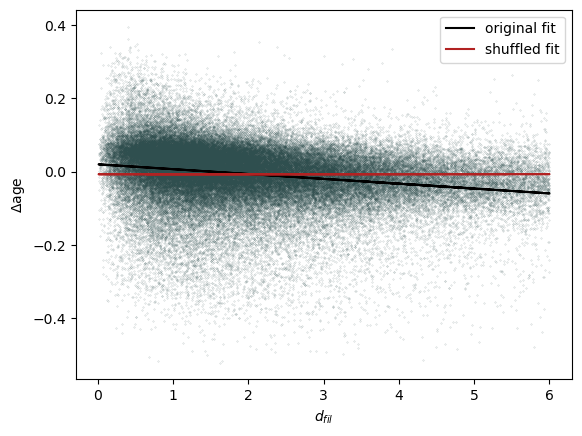

In [25]:
plt.scatter(X3, Y3, s = 0.05,alpha = 0.4, c = 'darkslategrey')
#plt.scatter(dfil_shuffled, Y3, s = 0.05,alpha = 0.1, c = 'darksalmon') 

plt.plot(X3, params[0]*X3 + params[1], c = 'k', label = 'original fit')
plt.plot(dfil_shuffled, params2[0]*dfil_shuffled + params2[1], c = 'firebrick', label = 'shuffled fit')
plt.xlabel('$d_{fil}$') ; plt.ylabel('$\Delta$age')
plt.legend()

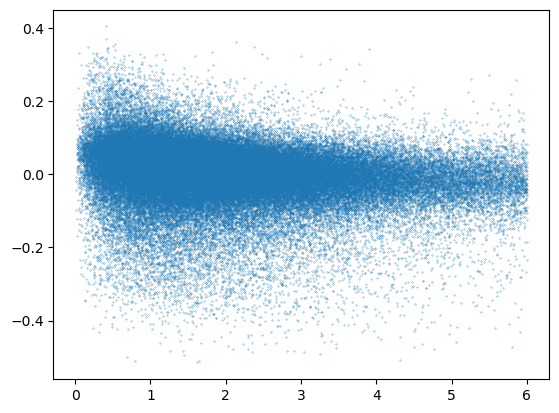

In [26]:
#residuals 
res2 = Y3 - (params2[0]*dfil_shuffled + params2[1])
plt.scatter(X3, res2, s = 0.05)

In [27]:
print(np.std(res), "\n", np.mean(res))

0.08149035370091269 
 3.630181573419376e-18


In [28]:
predicted_shuffled = params2[0]*dfil_shuffled + params2[1]
predicted_shuffled

array([-0.00671893, -0.00675544, -0.00700456, ..., -0.00694212,
       -0.0069654 , -0.00705229])

In [29]:
print(np.std(predicted_shuffled), "\n", np.mean(predicted_shuffled))

8.993821931488322e-05 
 -0.006955817123872889


### now we want to boostrap/repeat this a number of times to get uncertainties on shuffled d_fil? 

- maybe not boostrap, but reshuffle a number of times and get uncertainty

In [30]:
N = 10000 # how many times we want to iterate over
stds = np.zeros(N) ; mus = np.zeros(N)
dfil_shuffled = dfil_dmask[mask3]

for i in range(N): 
    np.random.shuffle(dfil_shuffled) # shuffles array for each iteration 
    paramz = np.polyfit(dfil_shuffled, Y3, 1) #dd fits line using shuffled array 
    predicted_shuffled = paramz[0]*dfil_shuffled + paramz[1]
    stds[i] = np.std(predicted_shuffled)
    mus[i] = np.mean(predicted_shuffled)

Text(0.5, 1.0, '$\\sigma$s of reshuffles')

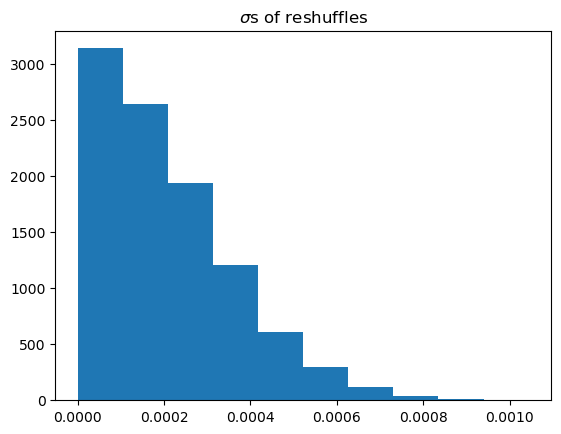

In [ ]:
plt.hist(stds) ; plt.title(r'$\sigma$s of reshuffles')

<Axes: ylabel='Count'>

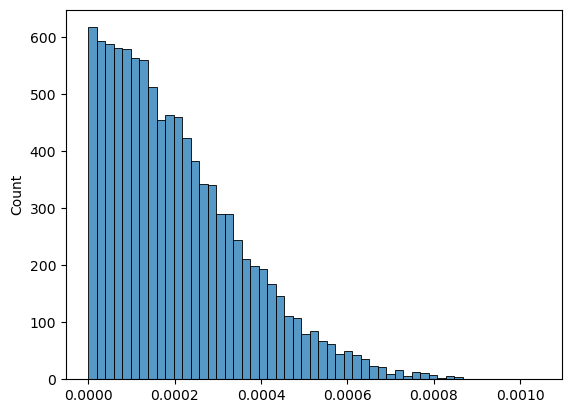

In [31]:
sns.histplot(stds)

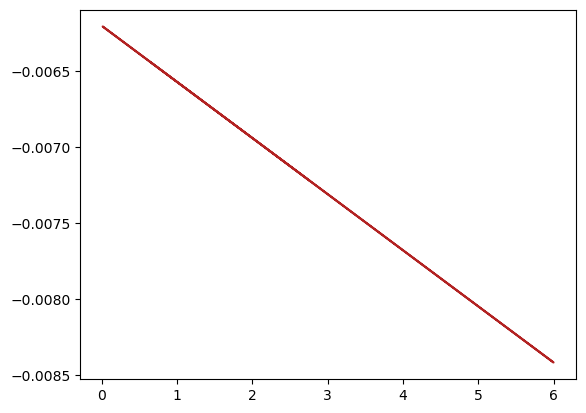

In [32]:
plt.plot(dfil_shuffled, params2[0]*dfil_shuffled + params2[1], c = 'firebrick', label = 'shuffled fit')

In [33]:
BLAH = params2[0]*dfil_shuffled + params2[1]
upperlim = np.zeros(len(BLAH)) ; lowerlim = np.zeros(len(BLAH))
N = len(BLAH)

for i in range(N):
    stds_range = stds*5
    upperlim[i] = BLAH[i] + np.mean(stds_range)
    lowerlim[i] = BLAH[i] - np.mean(stds_range)

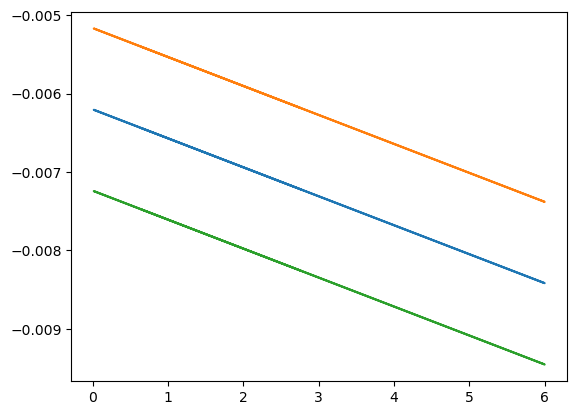

In [34]:
plt.plot(dfil_shuffled, BLAH, label = 'shuffled fit')
plt.plot(dfil_shuffled, upperlim, label = 'shuffled fit')
plt.plot(dfil_shuffled, lowerlim, label = 'shuffled fit')

Text(0, 0.5, '$\\Delta$age')

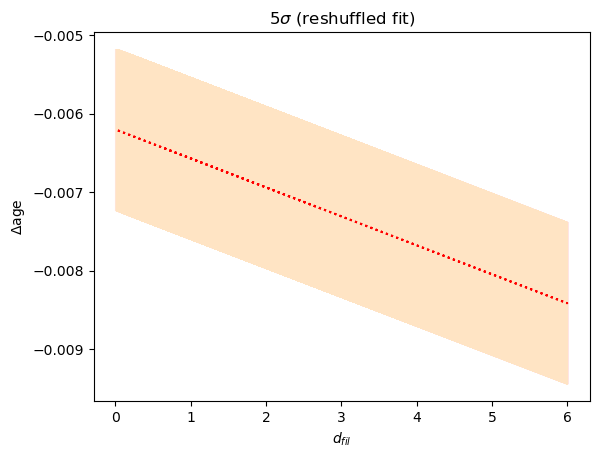

In [35]:
plt.vlines(dfil_shuffled, ymin = lowerlim, ymax = upperlim,color='bisque', alpha = 0.3)
plt.plot(dfil_shuffled, params2[0]*dfil_shuffled + params2[1], c = 'red', linestyle = 'dotted', label = 'shuffled fit')
plt.title(r'5$\sigma$ (reshuffled fit)')
plt.xlabel('$d_{fil}$') ; plt.ylabel('$\Delta$age')

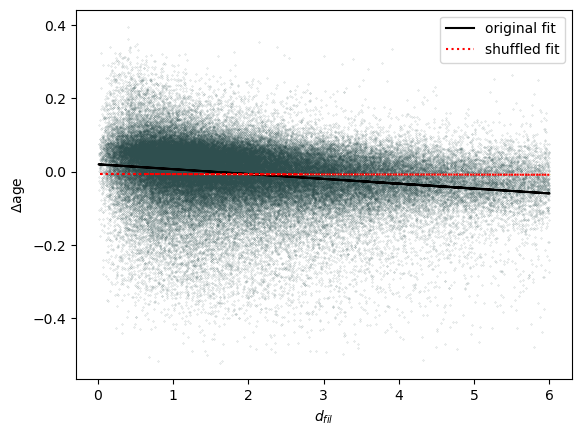

In [36]:
plt.scatter(X3, Y3, s = 0.05,alpha = 0.4, c = 'darkslategrey')
#plt.scatter(dfil_shuffled, Y3, s = 0.05,alpha = 0.1, c = 'darksalmon') 

plt.plot(X3, params[0]*X3 + params[1], c = 'k', label = 'original fit')

plt.vlines(dfil_shuffled, ymin = lowerlim, ymax = upperlim,color='bisque', alpha = 0.3)
plt.plot(dfil_shuffled, params2[0]*dfil_shuffled + params2[1], c = 'red', linestyle = 'dotted', label = 'shuffled fit')

plt.xlabel('$d_{fil}$') ; plt.ylabel('$\Delta$age')
plt.legend()

### NOW INSTEAD OF LINEAR FIT DO MEDIAN BINNING METHOD 

<ErrorbarContainer object of 3 artists>

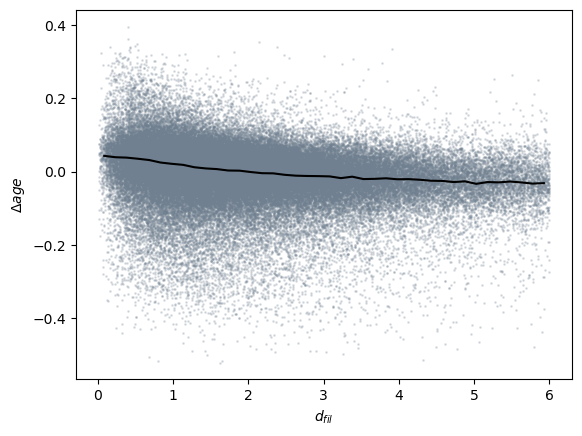

In [37]:
# Instead of line, do median fit 
bin_medians, bin_edges, binnumber = stats.binned_statistic(x=X3, values=Y3,statistic= 'median', bins = B)
std, s_edges, s_binnumber = stats.binned_statistic(x=X3, values = Y3, statistic = 'std', bins = B)
plt.figure()

plt.scatter(X3, Y3, s = 1,color = 'slategray', alpha = 0.2)
plt.xlabel("$d_{fil}$") ; plt.ylabel("$\Delta age$")

# Errorbars 
errbars = (bin_edges[1:] + bin_edges[:-1])/2        # x position of median points
plt.errorbar(errbars ,bin_medians, fmt='k-') 

In [38]:
## SUPER ZOOMED IN MASK (LESS THAN 2 MEGAPARSECS)
dfil = np.array(gama['fil_d'])
dfil_dmask = dfil[dmask] 

mask_2mpcs = np.where((dfil_dmask<2) & (dfil_dmask>0.01))

X_2mpc = dfil_dmask[mask_2mpcs] ; Y_2mpc = delta_age[mask_2mpcs] # define variables affected by mask 

<ErrorbarContainer object of 3 artists>

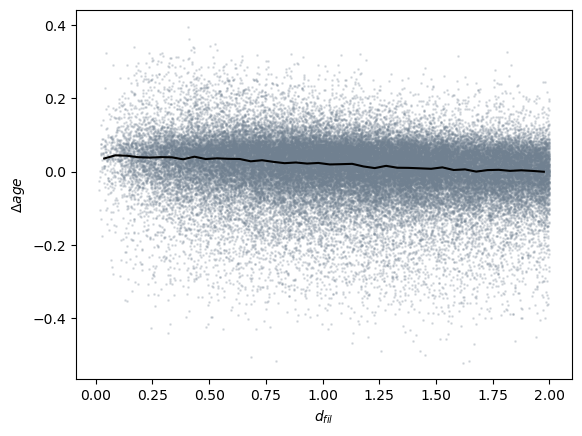

In [39]:
# MORE ZOOMED IN FIT for MEDIAN BINNING

bin_medians, bin_edges, binnumber = stats.binned_statistic(x=X_2mpc, values=Y_2mpc,statistic= 'median', bins = B)
std, s_edges, s_binnumber = stats.binned_statistic(x=X_2mpc, values = Y_2mpc, statistic = 'std', bins = B)
plt.figure()

plt.scatter(X_2mpc, Y_2mpc, s = 1,color = 'slategray', alpha = 0.2)
plt.xlabel("$d_{fil}$") ; plt.ylabel("$\Delta age$")

# Errorbars 
errbars = (bin_edges[1:] + bin_edges[:-1])/2        # x position of median points
plt.errorbar(errbars ,bin_medians, fmt='k-') 

In [40]:
errbars

array([0.0374251 , 0.08710876, 0.13679242, 0.18647608, 0.23615974,
       0.2858434 , 0.33552706, 0.38521072, 0.43489438, 0.48457805,
       0.53426171, 0.58394537, 0.63362903, 0.68331269, 0.73299635,
       0.78268001, 0.83236367, 0.88204733, 0.93173099, 0.98141465,
       1.03109831, 1.08078197, 1.13046563, 1.18014929, 1.22983295,
       1.27951661, 1.32920027, 1.37888393, 1.42856759, 1.47825125,
       1.52793492, 1.57761858, 1.62730224, 1.6769859 , 1.72666956,
       1.77635322, 1.82603688, 1.87572054, 1.9254042 , 1.97508786])

In [41]:
bin_medians

array([ 0.03607351,  0.04469797,  0.04358037,  0.03960586,  0.03854467,
        0.03969957,  0.0391993 ,  0.03377281,  0.04092148,  0.03457109,
        0.03645988,  0.03512744,  0.03473863,  0.02832696,  0.03123685,
        0.02686935,  0.02320228,  0.02502837,  0.02209452,  0.02379244,
        0.0197581 ,  0.02045807,  0.02136996,  0.01427178,  0.00973883,
        0.01589005,  0.01075139,  0.0103534 ,  0.00912559,  0.00786948,
        0.01172399,  0.0045636 ,  0.00617709,  0.00022399,  0.00428886,
        0.00508463,  0.00220013,  0.00379443,  0.00202133, -0.00022245])

### Calculate residuals 

In [42]:
def slope(X, Y):
    ''''Calculates slope and y-intercept given two arrays'''
    x1 = X[:-1]; x2 = X[1:]
    y1 = Y[:-1]; y2 = Y[1:]
    m = (y2 - y1) / (x2 - x1)
    b = -m*x1 + y1
    return m, b

#Directly save slopes and y-intercepts (as arrays)
m = slope(errbars, bin_medians)[0]
b = slope(errbars, bin_medians)[1]

slope(errbars, bin_medians)

def DeltaAge(x, y):
    '''
    Calculates exepcted y values base don slope function above
    Returns a 1d array of all expected values as well as the delta; 
    also takes care of indexing points between bin edges
    '''
    y_exp = np.zeros(len(y))   # initialize zero array 
    i = 0
    while i < (len(x)):
        xi = x[i]
        for n in range(15):       # number of bins 
            if xi <= errbars[n] and xi >= errbars[n-1]:
                Y = m[n] * xi + b[n]
                y_exp[i] = Y 
                dAge = y - y_exp
            else:
                pass
        i+=1
    return dAge, y_exp

In [43]:
res = DeltaAge(X3, Y3)[0]
y_exp = DeltaAge(X3, Y3)[1]

DeltaAge(X3, Y3)

(array([ 0.13586064,  0.05228726,  0.15667619, ..., -0.02528238,
        -0.04120476,  0.03191434]),
 array([0., 0., 0., ..., 0., 0., 0.]))

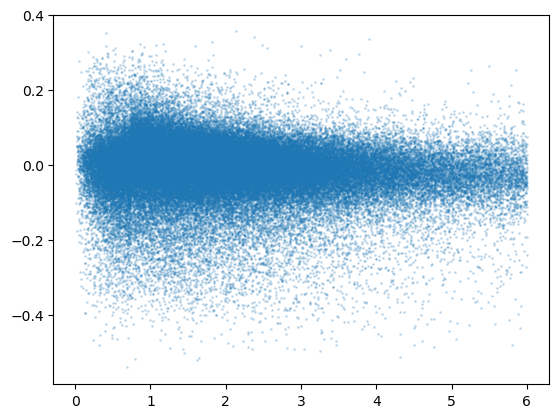

In [44]:
plt.scatter(X3, res, s = 1, alpha = 0.2)


### Shuffling here using these "residuals"

- no wait! No need to reshuffle!

In [45]:
N = 10000 # how many times we want to iterate over
stds = np.zeros(N) ; mus = np.zeros(N)
dfil_shuffled = dfil_dmask[mask3]

for i in range(N): 
    np.random.shuffle(dfil_shuffled) # shuffles array for each iteration 
    B = 40 
    
    bin_medians, bin_edges, binnumber = stats.binned_statistic(x=dfil_shuffled, values=Y3, statistic= 'median', bins = B)
    #std, s_edges, s_binnumber = stats.binned_statistic(x=dfil_shuffled, values = Y3, statistic = 'std', bins = B)
    
    predicted_shuffled = bin_medians
    stds[i] = np.std(predicted_shuffled)
    mus[i] = np.mean(predicted_shuffled)

Text(0.5, 1.0, '$\\sigma$s of reshuffles')

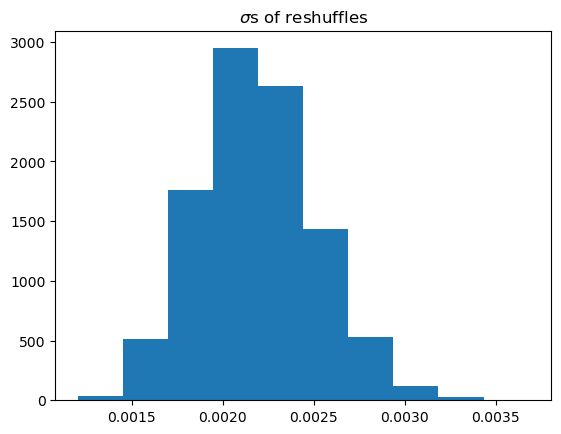

In [ ]:
plt.hist(stds) ; plt.title(r'$\sigma$s of reshuffles')

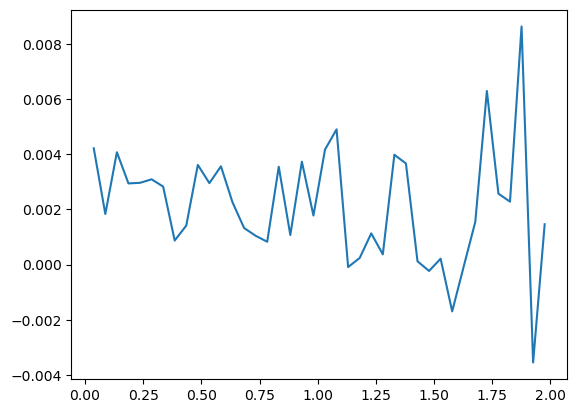

In [ ]:
plt.plot(errbars, bin_medians)

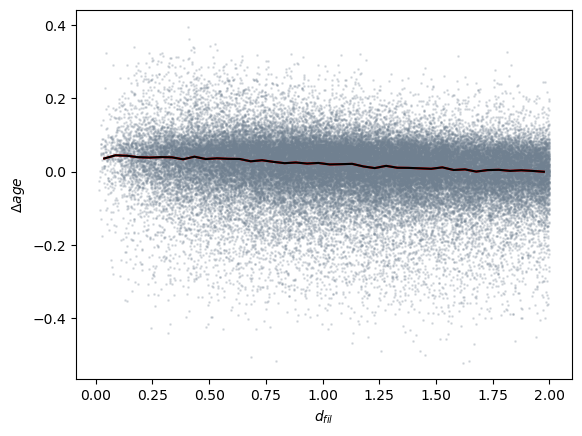

In [ ]:
# MORE ZOOMED IN FIT for MEDIAN BINNING

bin_medians, bin_edges, binnumber = stats.binned_statistic(x=X_2mpc, values=Y_2mpc,statistic= 'median', bins = B)
std, s_edges, s_binnumber = stats.binned_statistic(x=X_2mpc, values = Y_2mpc, statistic = 'std', bins = B)
plt.figure()

plt.scatter(X_2mpc, Y_2mpc, s = 1,color = 'slategray', alpha = 0.2)
plt.xlabel("$d_{fil}$") ; plt.ylabel("$\Delta age$")

# Errorbars 
errbars = (bin_edges[1:] + bin_edges[:-1])/2        # x position of median points
plt.errorbar(errbars ,bin_medians, fmt='k-') 

plt.plot(errbars, bin_medians, c = 'red')

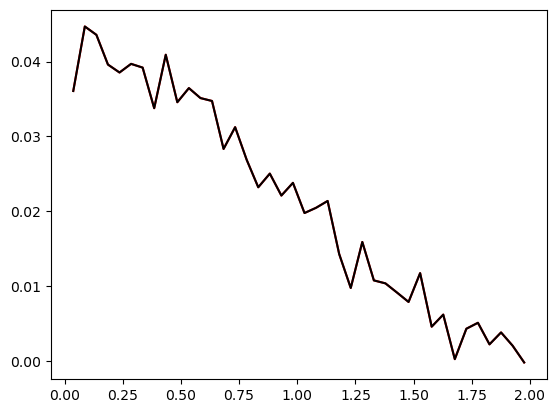

In [ ]:
plt.errorbar(errbars ,bin_medians, fmt='k-') 

plt.plot(errbars, bin_medians, c = 'red')